<a href="https://colab.research.google.com/github/TheGreemDark/LR_ML/blob/main/LR2_ML_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import библиотек

In [1]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"
import plotly.express as px # Библиотека Plotly. Модуль "Express"

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

from google.colab import files  # чтобы загружать файлы в облако через проводник

In [2]:
import warnings
warnings.filterwarnings('ignore')

#Набор данных
**Оценка возможности открытия депозитного счета в банке**

Набор данных об алмазах из библиотеки содержит информацию об алмазах, включая карат (числовой), чистоту (порядковый номер), огранку (порядковый номер) и цвет (порядковый номер). Цель состоит в том, чтобы предсказать цену бриллианта.

Целевой параметр для задачи предсказания (регрессии) — цена бриллианта.

- carat — масса бриллианта в каратах (числовой признак).
- cut — качество огранки (категориальный признак), например: Ideal, Premium, Good, Very Good.
- color — цвет камня (категориальный признак), обозначается буквами от D (лучший) до J (хуже).
- clarity — чистота камня (категориальный признак), например: SI1, VS2, VVS2, I1 и т.д.
- depth — глубина огранки в процентах (числовой признак), отношение высоты камня к его диаметру.
- table — ширина площадки огранки (top facet) в процентах (числовой признак).
- x, y, z — длина, ширина и высота камня в мм (числовые признаки).
- price — цена бриллианта в долларах (целевой числовой признак).


#Загрузка данных

In [3]:
uploaded = files.upload() #запуск и выбор файла в проводнике

Saving diamonds.csv to diamonds.csv


#Считывание файла в DataFrame
Используется метод .read_csv(path,delimiter)

In [4]:
df = pd.read_csv('/content/diamonds.csv', delimiter = ',') # Открытие загруженного файла, через полный путь к файлу (с именем)
df # В этом блокноте мы работаем с данными без дубликатов

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


#Информация о DataFrame
Метод .info()

In [5]:
df.info() # информация о данных в датафрейме: сколько строк, какие данные в столбцах, сколько пропущенных значений (Nan-values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Проверка на наличие категориальных и численных столбцов

In [6]:
cat_columns = [] # создание пустого списка для имен колонок категориальных данных
num_columns = [] # создание пустого списка для имен колонок числовых данных

for column_name in df.columns: # просмотр всех колонок в датафрейме
    if (df[column_name].dtypes == object): # проверка типов данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываются в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые
# вывод результатов
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['cut', 'color', 'clarity'] 
 Число столблцов =  3
Числовые данные:	  ['carat', 'depth', 'table', 'x', 'y', 'z', 'price'] 
 Число столблцов =  7


Список числовых и категориальных данных

#Поиск дубликатов
Использовались методы .duplicated() и .sum()



In [7]:
df.duplicated().sum() # метод .duplicated() возвращает данные в бинарном виде: является ли отдельная строка дубликатом (True если является)

np.int64(146)

**Были найдены дубли**

# Предварительная обработка числовых признаков

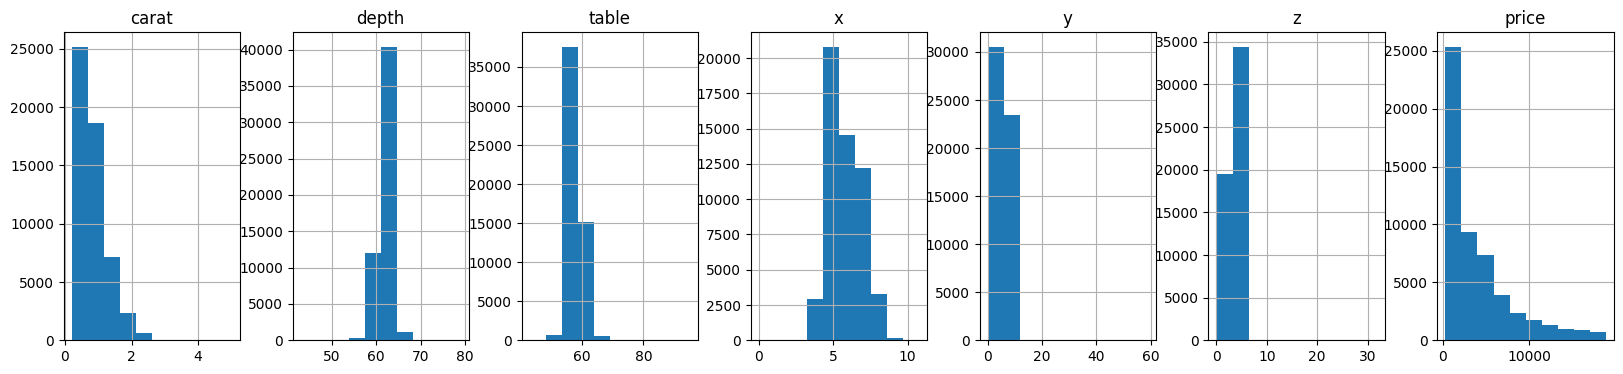

In [8]:
fig, axs = plt.subplots(1,7,figsize=(20,  4)) # создаем "полотно", на котором будем "рисовать" графики
#     ↑  более точная структура (почти синоним subplot). Говорим, что у нас будет 1 строка и 7 столбца

df.hist(column = num_columns, ax = axs );

- carat - нелинейно преобразовать

Распределение скошено вправо, большинство бриллиантов имеют массу до 1 карата, пик наблюдается около 0.2-0.5 карата. Малая часть камней крупнее 2 карат.

- depth - условно нормальное, поэтому нормировать

Глубина сосредоточена в узком диапазоне около 60-62%, что соответствует стандартам правильной огранки. Распределение узкое, без явных выбросов.

- table - условно нормальное, поэтому нормировать

Ширина площадки огранки преимущественно 55-65%, также сконцентрирована в узком диапазоне, близком к оптимальным параметрам.

- x, y, z  
x условно нормальное, поэтому нормировать; y и z нелинейно преобразовать

Длина (x) и ширина (y) имеют схожее распределение с пиком в районе 4-6 мм, при этом y имеет более длинный "хвост" вправо (есть более крупные камни). Высота (z) сосредоточена около 3-4 мм, но также иногда встречаются более высокие экземпляры.

- price - целевая переменная, поэтому ее исключаем из предобработки

Стоимость сильно скошена вправо — большая часть бриллиантов стоит меньше 5000, но есть значительное число дорогих камней (ценовые выбросы). Это типично для рынка, где большинство товаров средней ценовой категории и несколько очень дорогих.

# Предварительная обработка категориальных признаков

## Порядковое кодирование



### **Первый шаг**

Создание объекта класса `OneHotEncoder()` и его "обучение" методом `.fit`

In [9]:
ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)
ohe.fit(df[cat_columns]);

Смотрим, какие категории есть в отдельном признаке

In [10]:
ohe.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [11]:
ohe_feat = ohe.transform(df[cat_columns])
#                                       ↓с помощью метода получаем полные имена One-Hot кодировки
df_ohe = pd.DataFrame(ohe_feat, columns = ohe.get_feature_names_out()).astype(int)

df_ohe

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


## Класс для замены редких категориальных данных

Число повторений результата в каждом категориальном признаке

In [12]:
df[cat_columns].nunique()

,0
cut,5
color,7
clarity,8


Класс `RareGrouper` наследуется от классов `BaseEstimator` и `TransformerMixin` из sklearn.

Метод `fit` вычисляет относительную частоту категориальных признаков во входном DataFrame и сохраняет их в словаре.

Метод `transform` заменяет редкие категориальные признаки на строку `other_value`, указанную во время инициализации.

In [13]:
class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05, other_value='Other'):
        self.threshold = threshold
        self.other_value = other_value
        self.freq_dict = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=['object']):
            freq = X[col].value_counts(normalize=True)
            self.freq_dict[col] = freq[freq >= self.threshold].index.tolist()
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in X.select_dtypes(include=['object']):
            X_copy[col] = X_copy[col].apply(lambda x: x if x in self.freq_dict[col] else self.other_value)
        return X_copy

In [15]:
rg = RareGrouper(threshold=0.001, other_value='rare')
DF_cat_rare = rg.fit_transform(df[cat_columns])
DF_cat_rare

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


Число повторений результата в каждом категориальном признаке после замены

In [16]:
DF_cat_rare.nunique()

,0
cut,5
color,7
clarity,8


# Pipeline

Предварительная обработка была проведена

Из предварительной обработки исключена колонка `price`, потому что она является целевой меткой и будет обработана отдельно


In [17]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        self.columns = X.columns

        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

    def get_feature_names_out(self, feature_names):
        return self.columns

In [18]:
class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05, other_value='Other'):
        self.threshold = threshold
        self.other_value = other_value
        self.freq_dict = {}

    def fit(self, X, y=None):
        self.columns = X.columns
        for col in X.select_dtypes(include=['object']):
            freq = X[col].value_counts(normalize=True)
            self.freq_dict[col] = freq[freq >= self.threshold].index.tolist()
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in X.select_dtypes(include=['object']):
            X_copy[col] = X_copy[col].apply(lambda x: x if x in self.freq_dict[col] else self.other_value)
        return X_copy

    def get_feature_names_out(self, feature_names):
        return self.columns


In [19]:
#onehotencoder для категориальных данных
cat_pipe_category_cut = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])

cat_category_cut = ['cut', 'color', 'clarity']

#степенное преобразование
num_pipe_carat = Pipeline([
    ('power', PowerTransformer())
])

num_carat = ['carat', 'y', 'z']

#стандартизация
num_pipe_depth = Pipeline([
    ('scaler', StandardScaler())
])

num_depth = ['depth', 'table', 'x']



# Сделаем отдельно Pipeline с числовыми признаками
preprocessors_num = ColumnTransformer(transformers=[
    ('num_carat', num_pipe_carat, num_carat),
    ('num_depth', num_pipe_depth, num_depth),
])

# и Pipeline со всеми признаками
preprocessors_all = ColumnTransformer(transformers=[
    ('num_carat', num_pipe_carat, num_carat),
    ('num_depth', num_pipe_depth, num_depth),
    ('cat_category_cut', cat_pipe_category_cut, cat_category_cut),
])

In [20]:
# объединяем названия колонок в один список (порядок выставляется как в ColumnTransformer)
columns_num = np.hstack([num_carat,
                    num_depth,])

## Линейная Регрессия

Import библиотек

In [21]:
from sklearn.linear_model import SGDRegressor # Линейная регрессия с градиентным спуском от scikit-learn

from sklearn.model_selection import train_test_split#  функция разбиения на тренировочную и тестовую выборку
# в исполнении scikit-learn
from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные
from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn

from sklearn.metrics import PredictionErrorDisplay # Класс визуализации ошибок модели

**Считываем данные, разбиваем на тренировочную и валидационную**

In [22]:
# не забываем удалить целевую переменную цену из признаков
X,y = df.drop(columns = ['price']), df['price']

# разбиваем на тренировочную и валидационную
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# Оценка модели с использованием только числовых данных

Первый шаг - построение базовой модели (baseline), с которой будем сравнивать дальнейшие результаты

**Преобразуем данные**

In [23]:
# Сначала обучаем на тренировочных данных
preprocessors_num.fit(X_train)
X_train_prep = preprocessors_num.transform(X_train)
# потом на валидационной
X_val_prep = preprocessors_num.transform(X_val)

**Обучаем модель**

In [24]:
model = SGDRegressor(random_state = 42)

model.fit(X_train_prep, y_train);

## Подготовка нескольких функций для анализа обученной модели

**вытаскивание коэффициентов из модели**

In [25]:
def get_coefs (model):
    """Берем веса как атрибуты обученной модели.
    Входные переменные:
    ===========
    model: обученная модель
    """
    B0=model.intercept_[0]
    B=model.coef_
    return B0, B

**написание модели**

In [26]:
def print_model (B0,B,features_names):
    """Написание уравнения модели.
    Входные переменные:
    ===========
    B0: смещение (независимый коэффициент)
    weights: веса признаков
    features_names: список названий признаков
    """
    line='{:.3f}'.format(B0)
    sign=['+','-']
    for p,(fn,b) in enumerate(zip(features_names,B)):
        line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

    print('Решение')
    print(line)

**визуализации весов в виде столбчатых диаграмм**

In [27]:
def vis_weigths(weights,features_names = None, width = 1200, height = 600):
    """Отрисовка весов.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    """
    numbers = np.arange(0,len(weights))                 # создаем массив от 0 до количество весов-1
    if features_names:
        tick_labels = np.hstack(['B0',features_names])
    else:
        tick_labels = ['B'+str(num) for num in numbers] # создаем "названия" весов
    fig = go.Figure()
    fig.add_trace(go.Bar(x=numbers[weights<0], y=weights[weights<0],
                    marker_color='red',
                    name='отрицательные веса'))
    fig.add_trace(go.Bar(x=numbers[weights>=0], y=weights[weights>=0],
                    marker_color='blue',
                    name='положительные веса'
                    ))

    fig.update_layout(
                title="Веса модели",
                width=width,
                height=height,
                template = "plotly_dark",
                xaxis = dict(
                                         tickmode = 'array',
                                         tickvals = numbers,
                                         ticktext = tick_labels,
                                         )
                )

    fig.show()

### Уравнение модели

In [28]:
preprocessors_num.get_feature_names_out()

array(['num_carat__carat', 'num_carat__y', 'num_carat__z',
       'num_depth__depth', 'num_depth__table', 'num_depth__x'],
      dtype=object)

In [29]:
preprocessors_num.get_feature_names_out()[0]

'num_carat__carat'

In [30]:
preprocessors_num.get_feature_names_out()[0].split('__')

['num_carat', 'carat']

In [31]:
B0, B = get_coefs(model)
features_names = [x.split('__')[1] for x in preprocessors_num.get_feature_names_out()]
print_model(B0,B,features_names)

Решение
3928.623-2890.30*carat-4187.44*y-406.84*z+204.12*depth-165.73*table+10919.10*x


### Визуализация веса в виде столбчатых диаграмм

In [32]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

Интерпретация весов

In [33]:
preprocessors_num.named_transformers_['num_carat']['power'].lambdas_

array([-1.25443522, -0.05680636,  0.16864363])

In [34]:
preprocessors_num.named_transformers_['num_depth']['scaler'].mean_, preprocessors_num.named_transformers_['num_depth']['scaler'].scale_

(array([61.74492293, 57.46112877,  5.73537687]),
 array([1.42861128, 2.22660741, 1.12224742]))

Примерная интерпретация модели:
* средняя цена 3928 (коэффициент bias - b_0)
* изменение carat, y и z на величину на величину одного стандартного отклонения приводит к уменьшению значения цены на 2890, 4187 и 406 соответственно.
* изменение depth, table и x на величину 1 стандартного отклонения приводит к уменьшению значения цены на 165 для table и к увеличению цены на 204 и 10919 соответственно для depth и х.

### Визуализация веса в виде столбчатых диаграмм

In [35]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

Интерпретация весов

In [36]:
preprocessors_num.named_transformers_['num_carat']['power'].lambdas_

array([-1.25443522, -0.05680636,  0.16864363])

In [37]:
preprocessors_num.named_transformers_['num_depth']['scaler'].mean_, preprocessors_num.named_transformers_['num_depth']['scaler'].scale_

(array([61.74492293, 57.46112877,  5.73537687]),
 array([1.42861128, 2.22660741, 1.12224742]))

Примерная интерпретация модели:
* средняя цена 3928 (коэффициент bias - b_0)
* изменение carat, y и z на величину на величину одного стандартного отклонения приводит к уменьшению значения цены на 2890, 4187 и 406 соответственно.
* изменение depth, table и x на величину 1 стандартного отклонения приводит к уменьшению значения цены на 165 для table и к увеличению цены на 204 и 10919 соответственно для depth и х.

## Оценка метрик

In [38]:
def calculate_metric(model_pipe, X, y, metric = r2_score):
    """Расчет метрики.
    Параметры:
    ===========
    model_pipe: модель или pipeline
    X: признаки
    y: истинные значения
    metric: метрика (r2 - по умолчанию)
    """
    y_model = model_pipe.predict(X)
    return metric(y, y_model)

In [39]:
print(f"r2 на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(model, X_val_prep, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(model, X_val_prep, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.8277
r2 на валидационной выборке: 0.8284
mse на тренировочной выборке: 2765730.8744
mse на валидационной выборке: 2676990.6838


## Кросс-валидация

In [40]:
def cross_validation (X, y, model, scoring, cv_rule):
    """Расчет метрик на кросс-валидации.
    Параметры:
    ===========
    model: модель или pipeline
    X: признаки
    y: истинные значения
    scoring: словарь метрик
    cv_rule: правило кросс-валидации
    """
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_score = pd.DataFrame(scores)
    display(DF_score)
    print('\n')
    print(DF_score.mean()[2:])

In [41]:
scoring_reg = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           '-Max': 'max_error'}

In [42]:
cross_validation (X_train_prep, y_train,
                  model,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.139773,0.003562,0.842722,-2.546409e+06,-1049.448865,-13742.554929
1,0.167410,0.003942,0.838556,-2.608910e+06,-1045.926389,-15333.017537
2,0.133862,0.003332,0.808399,-3.025099e+06,-1099.220159,-30362.523010
3,0.161971,0.003231,0.824079,-2.949596e+06,-1111.308866,-29619.803557
4,0.152366,0.003011,0.849249,-2.379857e+06,-1022.543325,-10117.426681




test_R2      8.326008e-01
test_-MSE   -2.701974e+06
test_-MAE   -1.065690e+03
test_-Max   -1.983507e+04
dtype: float64


## Визуализация ошибок от scikit-learn

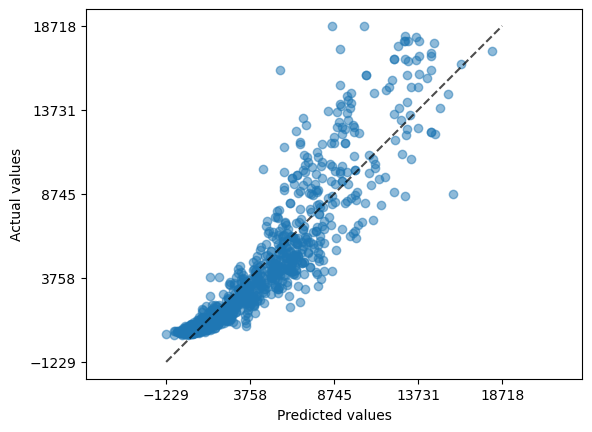

In [43]:
PredictionErrorDisplay.from_predictions(
    y_val,
    model.predict(X_val_prep),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
line_kwargs = {"color" : 'black'}
);

выводы по модели:

* используя шесть числовых признаков можно с достаточно большой погрешностью можно предсказывать цены на бриллианты

* есть небольшие проблемы предсказания цены на бриллианты

* модель выглядит относительно "логично": рост глубины и длины бриллиантов положительно сказывается на цене, рост остальных числовых признаков приводит к уменьшению цены.

# Объединение Pipeline предобработки и модели

Синтаксис - список из
* имен
* объектов

In [ ]:
pipe_num = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', SGDRegressor(random_state = 42))
])

Чтобы "обратиться" к части Pipeline - достаточно помнить "имя"

In [ ]:
pipe_num['preprocessors']

ColumnTransformer(transformers=[('num_carat',
                                 Pipeline(steps=[('power',
                                                  PowerTransformer())]),
                                 ['carat', 'y', 'z']),
                                ('num_depth',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['depth', 'table', 'x'])])

In [ ]:
pipe_num['model']

SGDRegressor(random_state=42)

Обучаем через `.fit()`

In [ ]:
pipe_num.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_carat',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['carat', 'y', 'z']),
                                                 ('num_depth',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['depth', 'table', 'x'])])),
                ('model', SGDRegressor(random_state=42))])

In [ ]:
B0, B = get_coefs(pipe_num['model'])
features_names =  [x.split('__')[1] for x in pipe_num[:-1].get_feature_names_out()]

print_model (B0,B,features_names)

Решение
3928.623-2890.30*carat-4187.44*y-406.84*z+204.12*depth-165.73*table+10919.10*x


In [ ]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.8277
r2 на валидационной выборке: 0.8284
mse на тренировочной выборке: 2765730.8744
mse на валидационной выборке: 2676990.6838


In [ ]:
cross_validation (X_train, y_train,
                  pipe_num,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.300420,0.010966,0.843086,-2.540506e+06,-1053.687750,-13810.758011
1,0.515737,0.015369,0.838721,-2.606234e+06,-1058.489723,-15304.349672
2,0.539512,0.014350,0.846778,-2.419149e+06,-1017.007602,-9251.352159
3,0.529136,0.015930,0.836188,-2.746567e+06,-1086.826466,-19785.193302
4,0.532890,0.016384,0.848650,-2.389299e+06,-1027.388145,-10043.590191




test_R2      8.426849e-01
test_-MSE   -2.540351e+06
test_-MAE   -1.048680e+03
test_-Max   -1.363905e+04
dtype: float64


# Оценка влияния предварительной обработки целевой переменной


Необходимо поправить целевую метку, так как она была не нормальная в плане нормального распределения

Для этого используем `TransformedTargetRegressor`

In [ ]:
from sklearn.compose import TransformedTargetRegressor

In [ ]:
pipe_num_transform = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', TransformedTargetRegressor(
        regressor=SGDRegressor(random_state = 42),
    transformer=PowerTransformer())
    )
])

In [ ]:
pipe_num_transform.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_carat',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['carat', 'y', 'z']),
                                                 ('num_depth',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['depth', 'table', 'x'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SGDRegressor(random_state=42),
                                            transformer=PowerTransformer()))])

In [ ]:
B0, B = get_coefs(pipe_num_transform['model'].regressor_)
features_names = [x.split('__')[1] for x in pipe_num_transform[:-1].get_feature_names_out()]

print_model (B0,B,features_names)

Решение
-0.001+0.98*carat+0.09*y+0.02*z-0.04*depth-0.04*table-0.12*x


In [ ]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

Интерпретация немного усложняется из-за того что модель теперь предсказывает не саму цену, а цену приведенную к нормальному распределению путем нелинейного преобразования

Тем не менее:
* рост карата приводит к увеличению стоимости
* рост ширины и высоты приводит к увеличению стоимости
* чем больше длина, ширина площадки огранки и глубина - тем меньше цена.

In [ ]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_num_transform, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_num_transform, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_num_transform, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_num_transform, X_val, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.8481
r2 на валидационной выборке: 0.8564
mse на тренировочной выборке: 2438006.0028
mse на валидационной выборке: 2240079.8444


Значения коэффициентов стали немного болше, по сравнению с предыдущим вариантом

In [ ]:
cross_validation (X_train, y_train,
                  pipe_num_transform,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.250809,0.011365,0.852063,-2.395162e+06,-838.665281,-18542.124493
1,0.269525,0.011172,0.867602,-2.139533e+06,-807.287666,-16107.759102
2,0.248003,0.011248,0.851151,-2.350113e+06,-828.447448,-15449.405863
3,0.258325,0.011593,0.840669,-2.671440e+06,-881.409294,-18849.724557
4,0.265315,0.017309,0.853615,-2.310922e+06,-801.496039,-18788.466115




test_R2      8.530200e-01
test_-MSE   -2.373434e+06
test_-MAE   -8.314611e+02
test_-Max   -1.754750e+04
dtype: float64


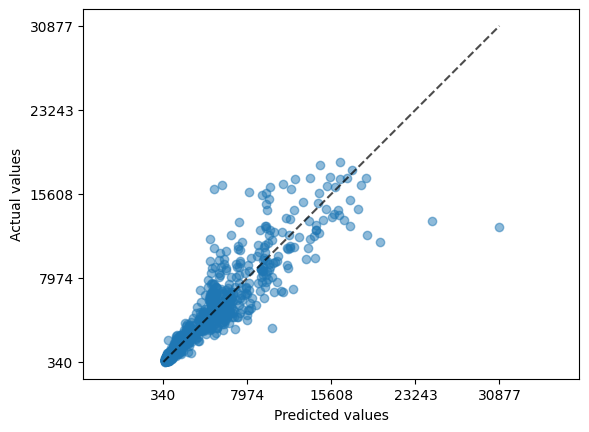

In [ ]:
PredictionErrorDisplay.from_predictions(
    y_val,
    pipe_num_transform.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    line_kwargs = {"color" : 'black'}
);

Выводы по модели:

* предварительная обработка целевой переменной улучшает результаты линейной модели (метрика r2 на кроссвалидации `0.83` против полученных `0.85`)

* в целом предварительная обработка целевой переменной улучшила предсказание низких значений цен (с большими ценами всё ещё проблемы)

* модель всё ещё выглядит "логично": рост значения карата, ширины и высоты положительно сказывается на цене, рост больше длина, ширина площадки огранки и глубина - отрицательно, однако нужно помнить что в этом случае связь - не линейная

# Оценка влияния категориальных признаков

In [ ]:
pipe_all_transform = Pipeline([
    ('preprocessors', preprocessors_all),
    ('model', TransformedTargetRegressor(
         regressor=SGDRegressor(random_state = 42),
    transformer=PowerTransformer())
    )
])

In [ ]:
pipe_all_transform.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_carat',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['carat', 'y', 'z']),
                                                 ('num_depth',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['depth', 'table', 'x']),
                                                 ('cat_category_cut',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SGDRegressor(random_state=42),
                                            transformer=PowerTransformer()))])

In [ ]:
cat_category_cut_names = pipe_all_transform['preprocessors'].transformers_[2][1]['encoder'].get_feature_names_out()

# объединение названий колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num_carat,
                    num_depth,
                    cat_category_cut_names])

In [ ]:
columns = [x.split('__')[1] for x in pipe_all_transform[:-1].get_feature_names_out()]

In [ ]:
B0, B = get_coefs(pipe_all_transform['model'].regressor_)
features_names = list(columns)

print_model (B0,B,features_names)

Решение
-0.044+1.03*carat+0.05*y+0.00*z+0.00*depth-0.00*table-0.01*x-0.10*cut_Fair-0.03*cut_Good+0.06*cut_Ideal+0.03*cut_Premium+0.00*cut_Very Good+0.20*color_D+0.15*color_E+0.11*color_F+0.04*color_G-0.06*color_H-0.17*color_I-0.31*color_J-0.62*clarity_I1+0.37*clarity_IF-0.12*clarity_SI1-0.28*clarity_SI2+0.09*clarity_VS1+0.02*clarity_VS2+0.28*clarity_VVS1+0.21*clarity_VVS2


**Модификация функции для отрисовки весов**

In [ ]:
def vis_weigths_threshold(weights, feature_names, threshold, width = 1200, height = 600):
    """Отрисовка весов с фильтром.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    threshold: порог "значимости" коэффициентов
    """
    # фильтруем веса коэффициентов
    mask = np.abs(weights) >= threshold
    weights_filtered = weights[mask]
    feature_names_filtered = [name for name, m in zip(feature_names, mask[1:]) if m]

    # Рисуем столбчатую диаграмму
    vis_weigths(weights_filtered,feature_names_filtered, width = width, height = height)

In [ ]:
Bs = np.hstack([B0,B])
fig = plt.figure(figsize = (15,5))
vis_weigths_threshold(Bs,columns, 0.1);

<Figure size 1500x500 with 0 Axes>

Каждый найденный вес для категориальных признаков показывает вклад в модель  отдельных категорий (относительно средней цены бриллианта)

- Среди признаков с положительным весом выделяются carat, color_D, color_E, а также clarity_I1, clarity_SI2, clarity_VVS1 — они увеличивают прогнозируемое значение.
- Отрицательные веса присутствуют у признаков color_F, color_I, color_J (с наибольшим отрицательным весом), clarity_IF, clarity_SI1 — эти признаки уменьшают предсказание модели.

In [ ]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.9608
r2 на валидационной выборке: 0.9603
mse на тренировочной выборке: 628493.9700
mse на валидационной выборке: 619431.8142


In [ ]:
cross_validation (X_train, y_train,
                  pipe_all_transform,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.340857,0.018025,0.959275,-659358.353146,-398.599302,-12635.628533
1,0.352026,0.018309,0.962692,-602896.465445,-395.487030,-8337.881167
2,0.349223,0.018838,0.955974,-695100.731927,-405.825836,-15170.708158
3,0.330263,0.019585,0.953345,-782242.052570,-421.657839,-15670.202631
4,0.345326,0.018705,0.965156,-550069.975250,-386.132242,-7441.421642




test_R2           0.959288
test_-MSE   -657933.515668
test_-MAE      -401.540450
test_-Max    -11851.168426
dtype: float64


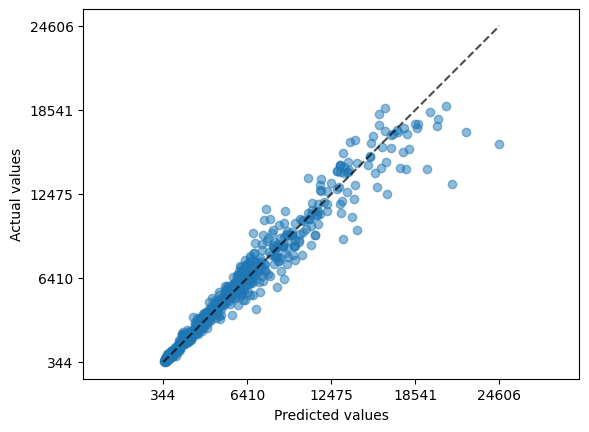

In [ ]:
PredictionErrorDisplay.from_predictions(
    y_val,
    pipe_all_transform.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
        line_kwargs = {"color" : 'black'}
);

Выводы по модели:

* добавление категориальных признаков улучшает результаты линейной модели (метрика r2 на кроссвалидации `0.96` против `0.90`)

* предсказание цен дорогих бриллиантов немного улучшилось

* добавляется интерпритация категориальных признаков: качество огранки, цвет и чистота камня оказывают влияние на цену, то есть оказывают положительный и отрицательный вклад в итоговую цену бриллианта.

# Сохранение модели

In [ ]:
from joblib import dump, load # в scikit-learn ничего такого особенного нет
# пользуемся joblib

In [ ]:
dump(model, 'model.joblib')  # чтобы сохранить объект
dump(pipe_num, 'pipe_num.joblib')  # чтобы сохранить объект
dump(pipe_num_transform, 'pipe_num_transform.joblib')  # чтобы сохранить объект
dump(pipe_all_transform, 'pipe_all_transform.joblib')  # чтобы сохранить объект

['pipe_all_transform.joblib']

In [ ]:
pipe_load = load('pipe_all_transform.joblib')  # чтобы загрузить из файла в формате joblib

In [ ]:
pipe_load

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_carat',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['carat', 'y', 'z']),
                                                 ('num_depth',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['depth', 'table', 'x']),
                                                 ('cat_category_cut',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SGDRegressor(random_state=42),
                                            transformer=PowerTransformer()))])

In [ ]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_load, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_load, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_load, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_load, X_val, y_val, mse):.4f}")

r2 на тренировочной выборке: 0.9608
r2 на валидационной выборке: 0.9603
mse на тренировочной выборке: 628493.9700
mse на валидационной выборке: 619431.8142
